## Colocation of CAM5.3-Oslo with Aeronet version 2 and 3 data

In [1]:
import pyaerocom as pya
import os

MODEL_ID = 'CAM5.3-Oslo_AP3-CTRL2016-PD'

AERONET_V3 = pya.const.AERONET_SUN_V3L2_AOD_DAILY_NAME
AERONET_V2 = pya.const.AERONET_SUN_V2L2_AOD_DAILY_NAME

TS_TYPE = 'yearly'
FILTER_NAME = 'WORLD-noMOUNTAINS'

### Read Aeronet v2 and v3 data

In [2]:
obs_reader = pya.io.ReadUngridded()

aero2 = obs_reader.read(AERONET_V2, 
                        vars_to_retrieve=['od550aer',
                                          'ang4487aer',
                                          'ang4487aer_calc'])

aero3 = obs_reader.read(AERONET_V3, 
                        vars_to_retrieve=['od550aer',
                                          'ang4487aer',
                                          'ang4487aer_calc'])

### Read modeldata

In [3]:
model_reader = pya.io.ReadGridded(MODEL_ID)

In [4]:
od550aer = model_reader.read_var('od550aer')
od550aer

pyaerocom.GriddedData
Grid data: <iris 'Cube' of Aerosol optical depth at 500nm / (1) (time: 12; latitude: 192; longitude: 288)>

In [5]:
ang4487aer = model_reader.read_var('ang4487aer')
ang4487aer

pyaerocom.GriddedData
Grid data: <iris 'Cube' of ang4487aer / (1) (time: 12; latitude: 192; longitude: 288)>

### Colocate different variables

#### AOD's at 550 nm

In [6]:
od550aer_col_v2 = pya.colocation.colocate_gridded_ungridded_2D(od550aer,
                                                               aero2,
                                                               ts_type=TS_TYPE,
                                                               filter_name=FILTER_NAME)

od550aer_col_v3 = pya.colocation.colocate_gridded_ungridded_2D(od550aer,
                                                               aero3,
                                                               ts_type=TS_TYPE,
                                                               filter_name=FILTER_NAME)

Old name of function colocate_gridded_ungridded(still works)


Interpolating data of shape (1, 192, 288). This may take a while.
Successfully interpolated cube


Old name of function colocate_gridded_ungridded(still works)


Interpolating data of shape (1, 192, 288). This may take a while.
Successfully interpolated cube


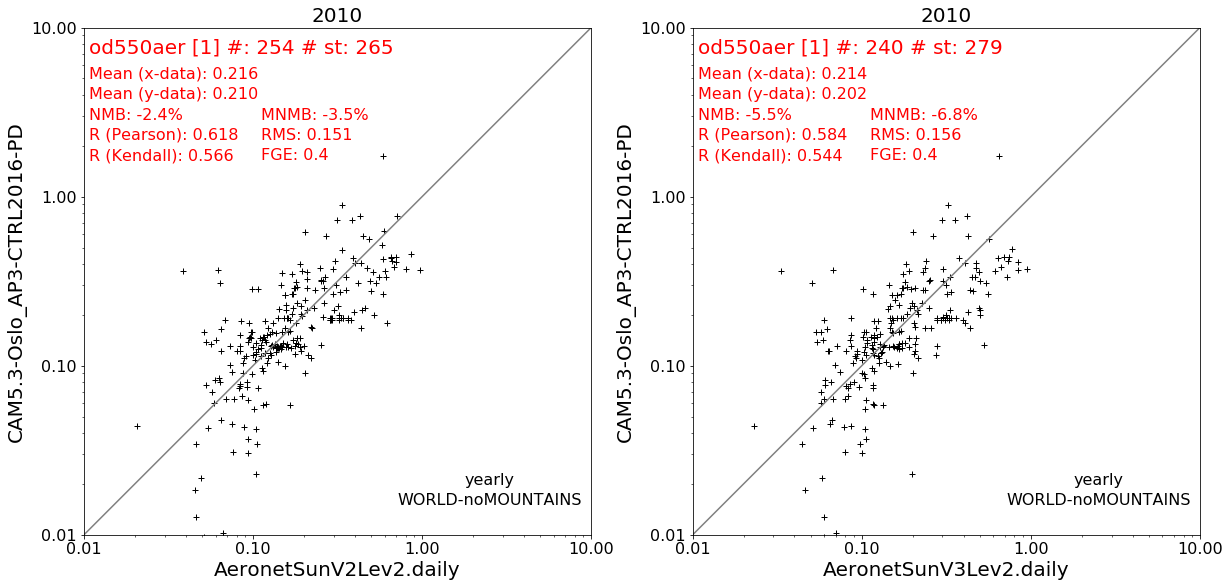

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(20, 12))
od550aer_col_v2.plot_scatter(ax=axes[0], fontsize_base=16)
od550aer_col_v3.plot_scatter(ax=axes[1], fontsize_base=16)

#### Angstrom coefficients

Both datasets (Aeronet v2 and v3) contain Angstrom coefficients provided in the original data files (``ang4487aer``) as well as coefficients that are computed from provided AODs at available wavelengths (``ang4487aer_calc``). 

In [8]:
ang4487aer_col_v2 = pya.colocation.colocate_gridded_ungridded_2D(ang4487aer,
                                                                 aero2,
                                                                 ts_type=TS_TYPE,
                                                                 filter_name=FILTER_NAME)

ang4487aer_col_v3 = pya.colocation.colocate_gridded_ungridded_2D(ang4487aer,
                                                                 aero3,
                                                                 ts_type=TS_TYPE,
                                                                 filter_name=FILTER_NAME)

Old name of function colocate_gridded_ungridded(still works)


Interpolating data of shape (1, 192, 288). This may take a while.
Successfully interpolated cube


Old name of function colocate_gridded_ungridded(still works)


Interpolating data of shape (1, 192, 288). This may take a while.
Successfully interpolated cube


#### NOTE: the version 3 data contains (negative) outliers

In [9]:
print('Version 2 min, max: ({:.2f}, {:.2f})'.format(ang4487aer_col_v2.data.min().data, ang4487aer_col_v2.data.max().data))
print('Version 3 min, max: ({:.2f}, {:.2f})'.format(ang4487aer_col_v3.data.min().data, ang4487aer_col_v3.data.max().data))      

Version 2 min, max: (0.05, 2.12)
Version 3 min, max: (-22.77, 2.12)


##### Using all values

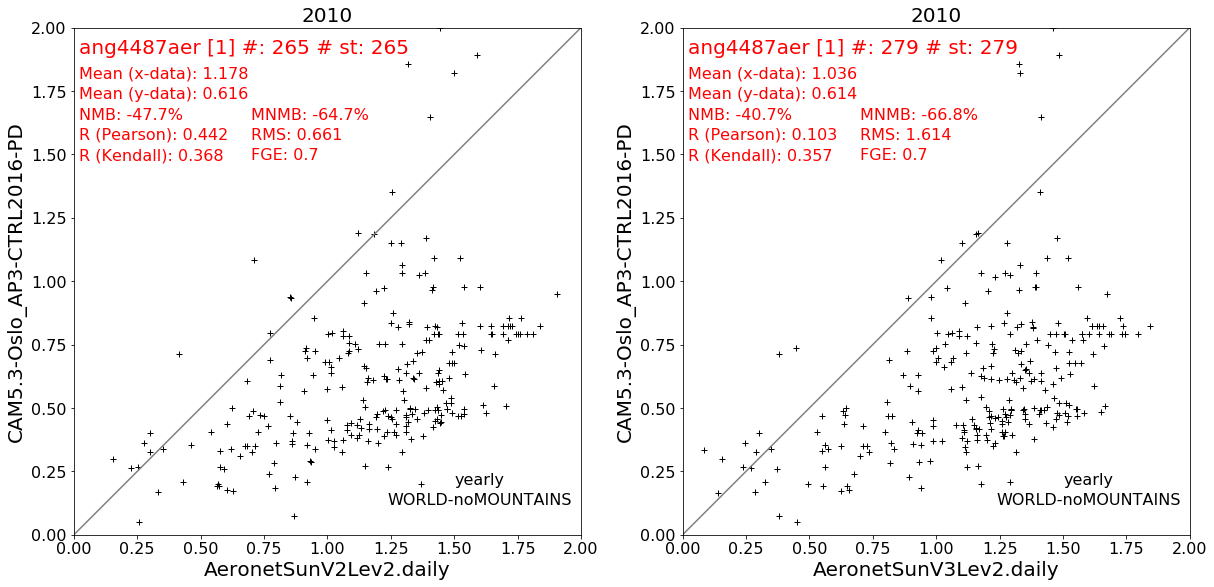

In [10]:
fig, axes = plt.subplots(1,2, figsize=(20, 12))
ang4487aer_col_v2.plot_scatter(ax=axes[0], fontsize_base=16)
ang4487aer_col_v3.plot_scatter(ax=axes[1], fontsize_base=16)

##### Constraining values to pre-defined value range for Angstrom coefficient (-0.5, 4) -> set in variables.ini file of pyaerocom

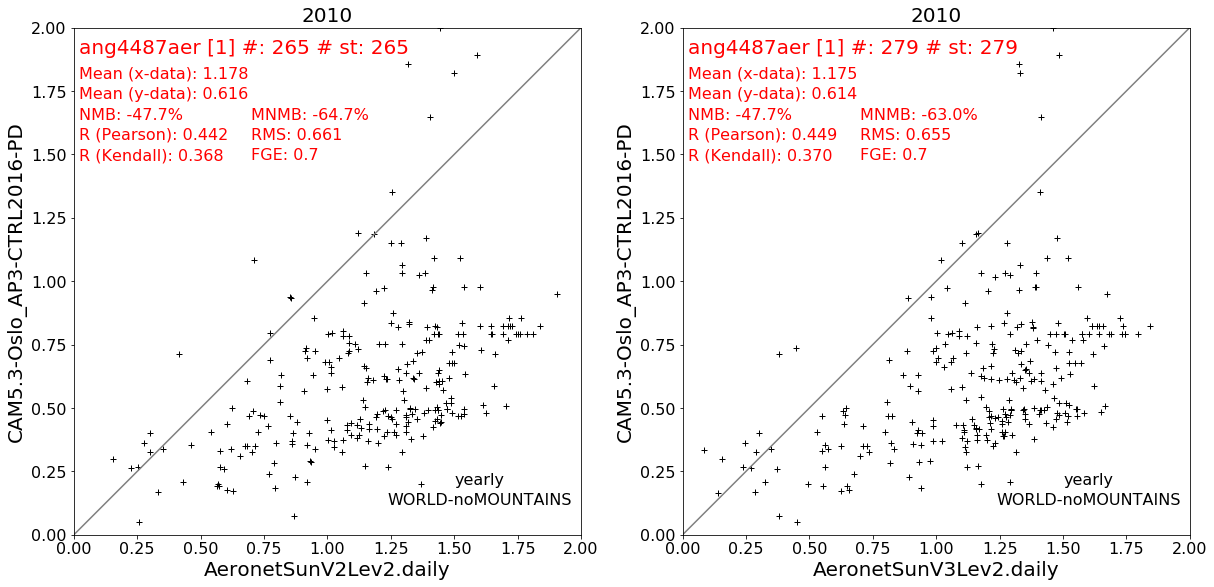

In [11]:
fig, axes = plt.subplots(1,2, figsize=(20, 12))
ang4487aer_col_v2.plot_scatter(ax=axes[0], fontsize_base=16, constrain_val_range=True)
ang4487aer_col_v3.plot_scatter(ax=axes[1], fontsize_base=16, constrain_val_range=True)

**Note the differences in the Pearson correlation coefficients**